# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | tondano
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | aktau
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ruscova
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | newman
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | lilongwe
Processing Record 16 of Set 1 | pangobilian
Processing Record 17 of Set 1 | bria
Processing Record 18 of Set 1 | south hedland
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | lautoka
Processing Recor

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                571
Lat                 571
Lng                 571
Max Temp (C)        571
Humidity (%)        571
Cloudiness (%)      571
Wind Speed (m/s)    571
Country             571
Date                571
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,puerto ayora,-0.7393,-90.3518,28.98,100,92,4.92,EC,1699552748
1,adamstown,-25.0660,-130.1015,22.45,87,100,6.86,PN,1699552749
2,anadyr,64.7500,177.4833,-5.72,79,75,7.00,RU,1699552750
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,73,20,9.39,RU,1699552750
4,tondano,1.3038,124.9112,20.05,93,71,0.62,ID,1699552751


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,100,92,4.92,EC,1699552748
1,adamstown,-25.0660,-130.1015,22.45,87,100,6.86,PN,1699552749
2,anadyr,64.7500,177.4833,-5.72,79,75,7.00,RU,1699552750
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,73,20,9.39,RU,1699552750
4,tondano,1.3038,124.9112,20.05,93,71,0.62,ID,1699552751


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

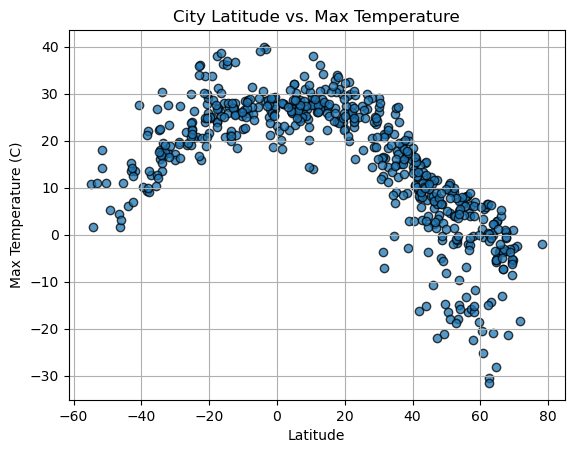

In [13]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp (C)"]
plt.scatter(x_values,y_values, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

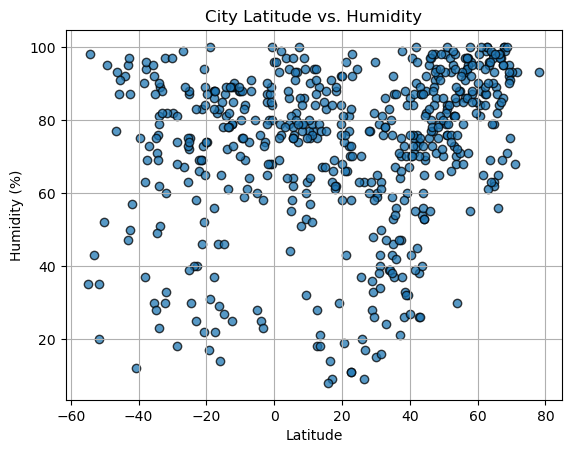

In [14]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity (%)"]
plt.scatter(x_values,y_values, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

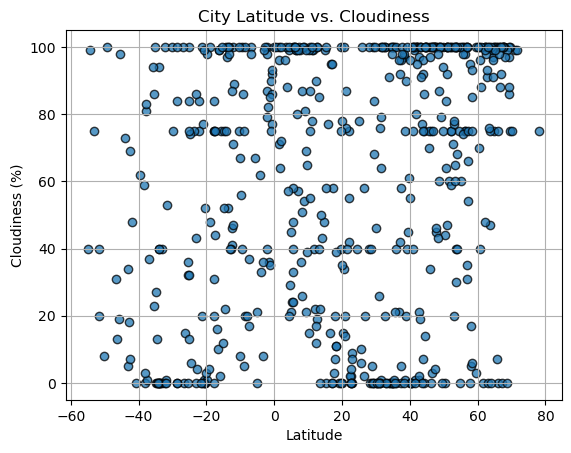

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness (%)"]
plt.scatter(x_values,y_values, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

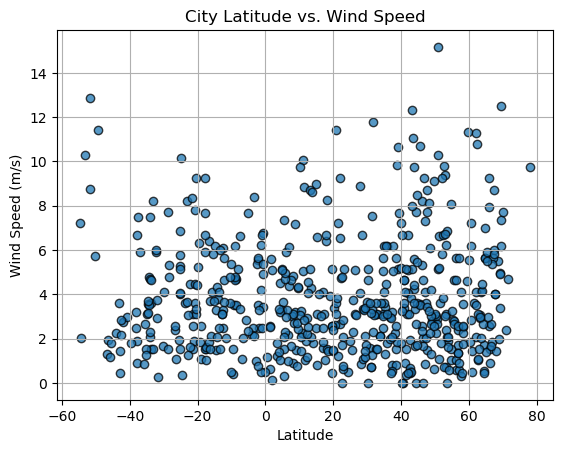

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed (m/s)"]
plt.scatter(x_values,y_values, alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linearR(df,x,y,linex,liney,xlabelchange,title):
    x_values = df[x]
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(linex,liney),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(str(xlabelchange))
    plt.ylabel(str(y))
    print(f"The r-squared value is: {rvalue**2}")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,-5.72,79,75,7.00,RU,1699552750
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,73,20,9.39,RU,1699552750
4,tondano,1.3038,124.9112,20.05,93,71,0.62,ID,1699552751
5,iqaluit,63.7506,-68.5145,-0.15,69,75,4.12,CA,1699552752
6,aktau,43.6500,51.2000,15.32,54,77,11.05,KZ,1699552753


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,28.98,100,92,4.92,EC,1699552748
1,adamstown,-25.0660,-130.1015,22.45,87,100,6.86,PN,1699552749
11,avarua,-21.2078,-159.7750,24.03,83,20,3.09,CK,1699552519
13,luderitz,-26.6481,15.1594,19.05,67,0,2.37,NaN,1699552758
14,lilongwe,-13.9669,33.7873,21.30,72,97,3.78,MW,1699552759


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.6993154883120216


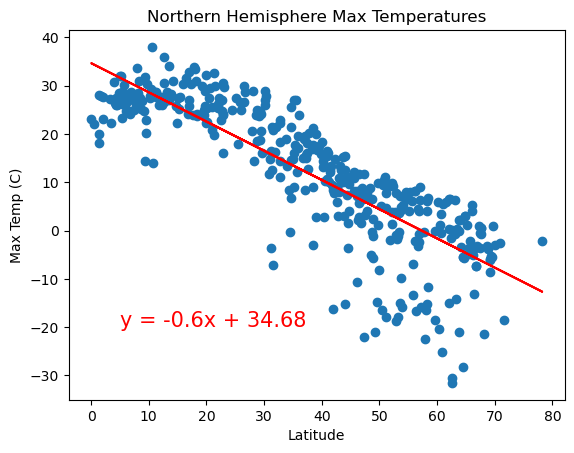

In [27]:
# Linear regression on Northern Hemisphere
linearR(northern_hemi_df,"Lat","Max Temp (C)",5,-20,"Latitude","Northern Hemisphere Max Temperatures")

The r-squared value is: 0.517459297788637


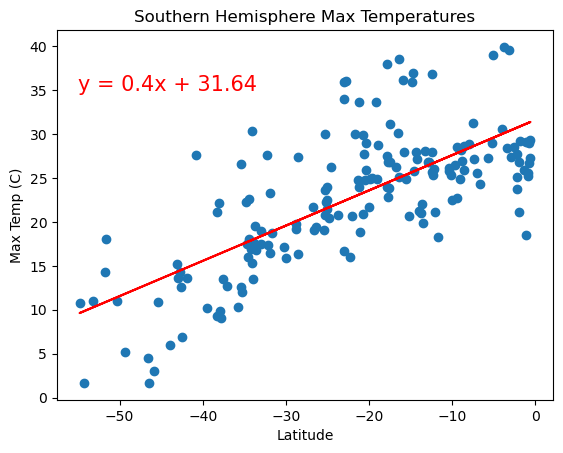

In [34]:
# Linear regression on Southern Hemisphere
linearR(southern_hemi_df,"Lat","Max Temp (C)",-55,35,"Latitude","Southern Hemisphere Max Temperatures")

**Discussion about the linear relationship:** The northern hemisphere has a moderate negative correlation while the southern hemisphere has a moderate positive correlation.These correlations make sense because as you go higher in latitude, away from the equator (0), in the northern hemisphere the closer to the north pole you become and the colder the temperatures drop. Similarly for the southern hemispehere as you move lower, away from the equator (0), the closer to the south pole you are and the temperatures drop.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.07774699766208193


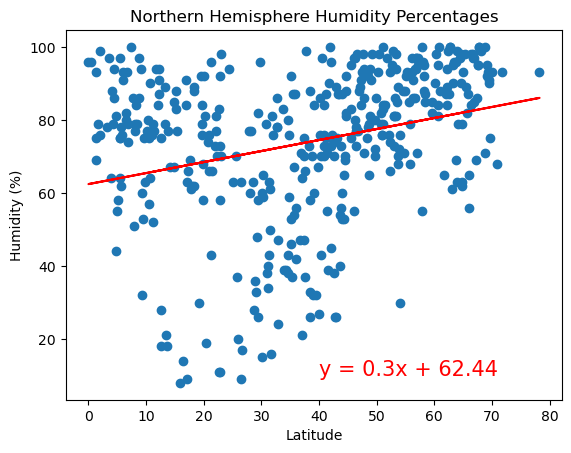

In [36]:
# Northern Hemisphere
linearR(northern_hemi_df,"Lat","Humidity (%)",40,10,"Latitude","Northern Hemisphere Humidity Percentages")

The r-squared value is: 0.008985848536676565


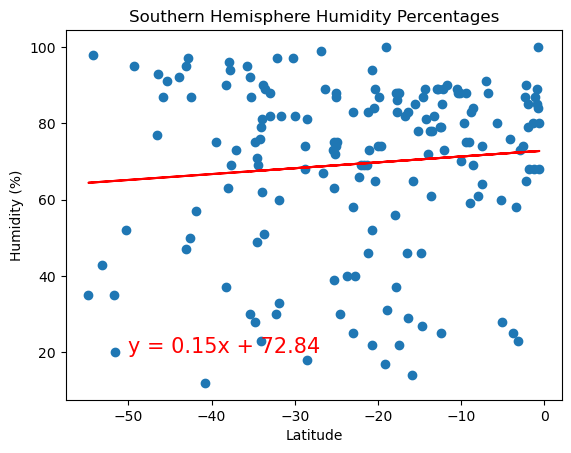

In [37]:
# Southern Hemisphere
linearR(southern_hemi_df,"Lat","Humidity (%)",-50,20,"Latitude","Southern Hemisphere Humidity Percentages")

**Discussion about the linear relationship:** Since the r-sqaured values are less than 0.3 there is no correlation between humidity and latitude for either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.03972451260073074


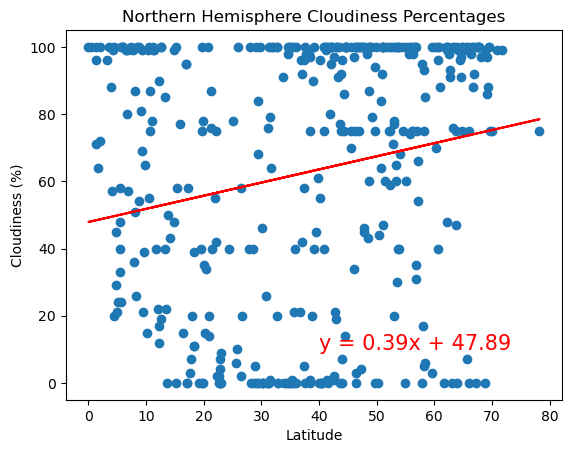

In [38]:
# Northern Hemisphere
linearR(northern_hemi_df,"Lat","Cloudiness (%)",40,10,"Latitude","Northern Hemisphere Cloudiness Percentages")

The r-squared value is: 0.06655718683986551


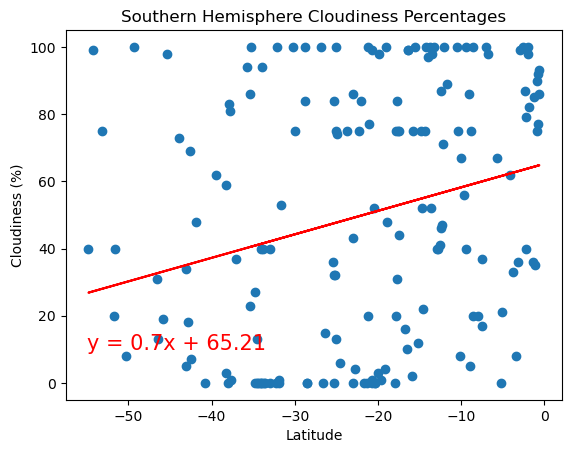

In [39]:
# Southern Hemisphere
linearR(southern_hemi_df,"Lat","Cloudiness (%)",-55,10,"Latitude","Southern Hemisphere Cloudiness Percentages")

**Discussion about the linear relationship:** Since the r-squared values are less than 0.3 there is no correlation between cloudiness and latitude for either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.01289737979337139


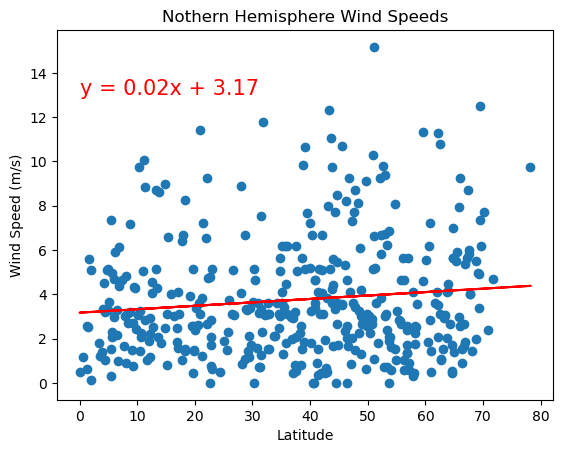

In [46]:
# Northern Hemisphere
linearR(northern_hemi_df,"Lat","Wind Speed (m/s)",0,13,"Latitude","Nothern Hemisphere Wind Speeds")

The r-squared value is: 0.00292468604821448


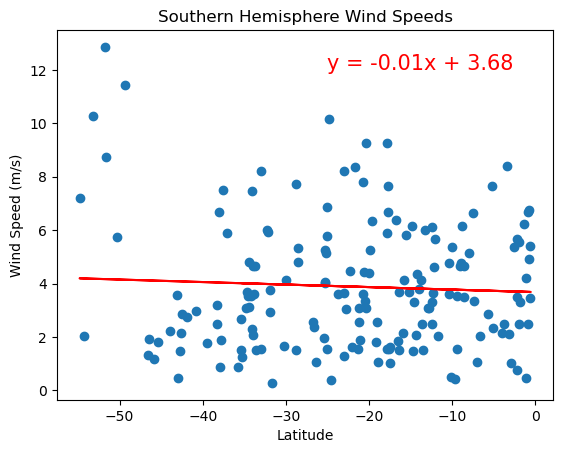

In [45]:
# Southern Hemisphere
linearR(southern_hemi_df,"Lat","Wind Speed (m/s)",-25,12,"Latitude","Southern Hemisphere Wind Speeds")

**Discussion about the linear relationship:** Since the r-squared values are less than 0.3 there is no correlation between wind speed and latitude for either hemisphere.